<a href="https://colab.research.google.com/github/RachelNderitu/Deep-Learning-for-Computer-Vision/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Download Dataset**

**The code below downloads and extracts the COCO 2017 validation dataset, including images and annotations, into a specified directory. This prepares the dataset for use in object detection**

In [ ]:
# Download COCO 2017 Validation dataset (images + annotations)
!mkdir -p datasets/coco
!wget -c http://images.cocodataset.org/zips/val2017.zip -P datasets/coco/
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P datasets/coco/

# Unzip the dataset
!unzip -q datasets/coco/val2017.zip -d datasets/coco/
!unzip -q datasets/coco/annotations_trainval2017.zip -d datasets/coco/

--2025-02-13 16:39:09--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.173.241, 3.5.27.59, 52.217.121.9, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.173.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘datasets/coco/val2017.zip’

val2017.zip         100%[===================>] 777.80M  55.0MB/s    in 15s     

2025-02-13 16:39:24 (53.3 MB/s) - ‘datasets/coco/val2017.zip’ saved [815585330/815585330]

--2025-02-13 16:39:24--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.94.36, 52.217.44.4, 52.217.129.145, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.94.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘datasets/coco/annotations_

#**2. Preprocessing**

**The code below verifies whether the COCO 2017 validation dataset has been extracted correctly, then it prints the total number of images and confirms the presence of the annotation file.**

In [ ]:
import os

# Define paths
coco_images_path = "datasets/coco/val2017/"
coco_annotation_path = "datasets/coco/annotations/instances_val2017.json"

# Verify if the dataset is correctly extracted
print("Total Images:", len(os.listdir(coco_images_path)))
print("Annotation File Exists:", os.path.exists(coco_annotation_path))

Total Images: 5000
Annotation File Exists: True


**The code below loads and processes the COCO 2017 validation dataset annotations using the pycocotools library. This ensures the dataset is properly loaded and allows for further exploration of the COCO labels.** **bold text**

In [ ]:
from pycocotools.coco import COCO

# Load COCO annotations
annotation_file = "datasets/coco/annotations/instances_val2017.json"
coco = COCO(annotation_file)

# Load category names
category_names = {cat['id']: cat['name'] for cat in coco.loadCats(coco.getCatIds())}

print("COCO Dataset Loaded Successfully!")
print("Total Categories:", len(category_names))
print("Example Categories:", list(category_names.values())[:10])

loading annotations into memory...
Done (t=0.73s)
creating index...
index created!
COCO Dataset Loaded Successfully!
Total Categories: 80
Example Categories: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light']


**The code below loads specific images from the COCO 2017 validation dataset using pycocotools. This ensures that the selected images are correctly retrieved for further object detection tasks.**

In [ ]:
from pycocotools.coco import COCO

# Load COCO 2017 Validation Annotations
annotation_file = "datasets/coco/annotations/instances_val2017.json"
coco = COCO(annotation_file)  # 🔹 Load COCO dataset



# Use 10 fixed image IDs
fixed_image_ids = [296657, 578967, 71451, 133969, 65074, 331317, 35963, 364884, 555597, 402992]

# Load corresponding image info from COCO dataset
fixed_images_info = coco.loadImgs(fixed_image_ids)

# Print file names to verify they match Faster R-CNN
print("Selected Image Filenames:", [img["file_name"] for img in fixed_images_info])



loading annotations into memory...
Done (t=0.66s)
creating index...
index created!
Selected Image Filenames: ['000000296657.jpg', '000000578967.jpg', '000000071451.jpg', '000000133969.jpg', '000000065074.jpg', '000000331317.jpg', '000000035963.jpg', '000000364884.jpg', '000000555597.jpg', '000000402992.jpg']


**The code below loads and prints COCO category labels from the dataset. This helps in label mapping for object detection models, ensuring correct class associations in the dataset.**

In [ ]:
# Load COCO category labels
category_names = {cat['id']: cat['name'] for cat in coco.loadCats(coco.getCatIds())}

# Print to verify
print("Loaded COCO Categories:", category_names)


Loaded COCO Categories: {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 

#**3. Inference**

**Run Faster R-CNN**

**The code below runs Faster R-CNN on a set of predefined images from the COCO 2017 validation dataset, detects objects, and saves the images with bounding boxes. It helps visualize Faster R-CNN detections on COCO images and is useful for evaluating model performance**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

# Load Faster R-CNN
faster_rcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
faster_rcnn.eval()

# Run Faster R-CNN on selected images
for i, image_info in enumerate(fixed_images_info):
    image_path = f"datasets/coco/val2017/{image_info['file_name']}"

    # Load and preprocess image
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)

    # Run Faster R-CNN
    with torch.no_grad():
        prediction = faster_rcnn(image_tensor)[0]

    # Convert to OpenCV format
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Draw bounding boxes
    for box, label, score in zip(prediction["boxes"], prediction["labels"], prediction["scores"]):
        if score > 0.5:  # Confidence threshold
            x_min, y_min, x_max, y_max = map(int, box.tolist())
            cv2.rectangle(image_cv, (x_min, y_min), (x_max, y_max), (0, 0, 255), 3)
            label_text = f"{category_names.get(label.item(), 'Unknown')} ({score:.2f})"
            cv2.putText(image_cv, label_text, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Save output
    output_path = f"faster_rcnn_output_{i+1}.png"
    cv2.imwrite(output_path, image_cv)


**The code below installs the Ultralytics YOLO package, which provides pre-trained YOLO (You Only Look Once) models for object detection.**

**Ultralytics includes the latest YOLOv8 models.
It provides easy-to-use APIs for training and inference.
It supports real-time object detection with high accuracy.
It allows model deployment on various devices (CPU, GPU, and even mobile).**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

**Run YOLO**

**The code below runs YOLOv8 on a set of predefined images from the COCO 2017 validation dataset and saves the detection results.**

In [ ]:
from ultralytics import YOLO

# Load YOLO model
yolo_model = YOLO("yolov8n.pt")  # Try "yolov8m.pt" or "yolov8l.pt" for better accuracy

# Set confidence threshold
conf_threshold = 0.5

# Run YOLO on the fixed images
for i, image_info in enumerate(fixed_images_info):
    image_path = f"datasets/coco/val2017/{image_info['file_name']}"

    # Run YOLO with higher confidence threshold
    results = yolo_model(image_path, conf=conf_threshold)

    # Save the detection results
    results[0].save(f"yolo_output_{i+1}.png")



image 1/1 /content/datasets/coco/val2017/000000296657.jpg: 448x640 5 persons, 61.9ms
Speed: 6.3ms preprocess, 61.9ms inference, 369.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/datasets/coco/val2017/000000578967.jpg: 480x640 1 train, 62.5ms
Speed: 3.3ms preprocess, 62.5ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/datasets/coco/val2017/000000071451.jpg: 640x384 1 bed, 87.7ms
Speed: 2.5ms preprocess, 87.7ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /content/datasets/coco/val2017/000000133969.jpg: 448x640 11 persons, 9.8ms
Speed: 3.3ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/datasets/coco/val2017/000000065074.jpg: 640x448 1 bed, 61.1ms
Speed: 2.9ms preprocess, 61.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content/datasets/coco/val2017/000000331317.jpg: 512x640 1 clock, 65.2ms
Speed: 2.4

#**4. Model Comparison**

**The code below visually compares Faster R-CNN and YOLOv8 detection results side by side for the 10 selected images.**

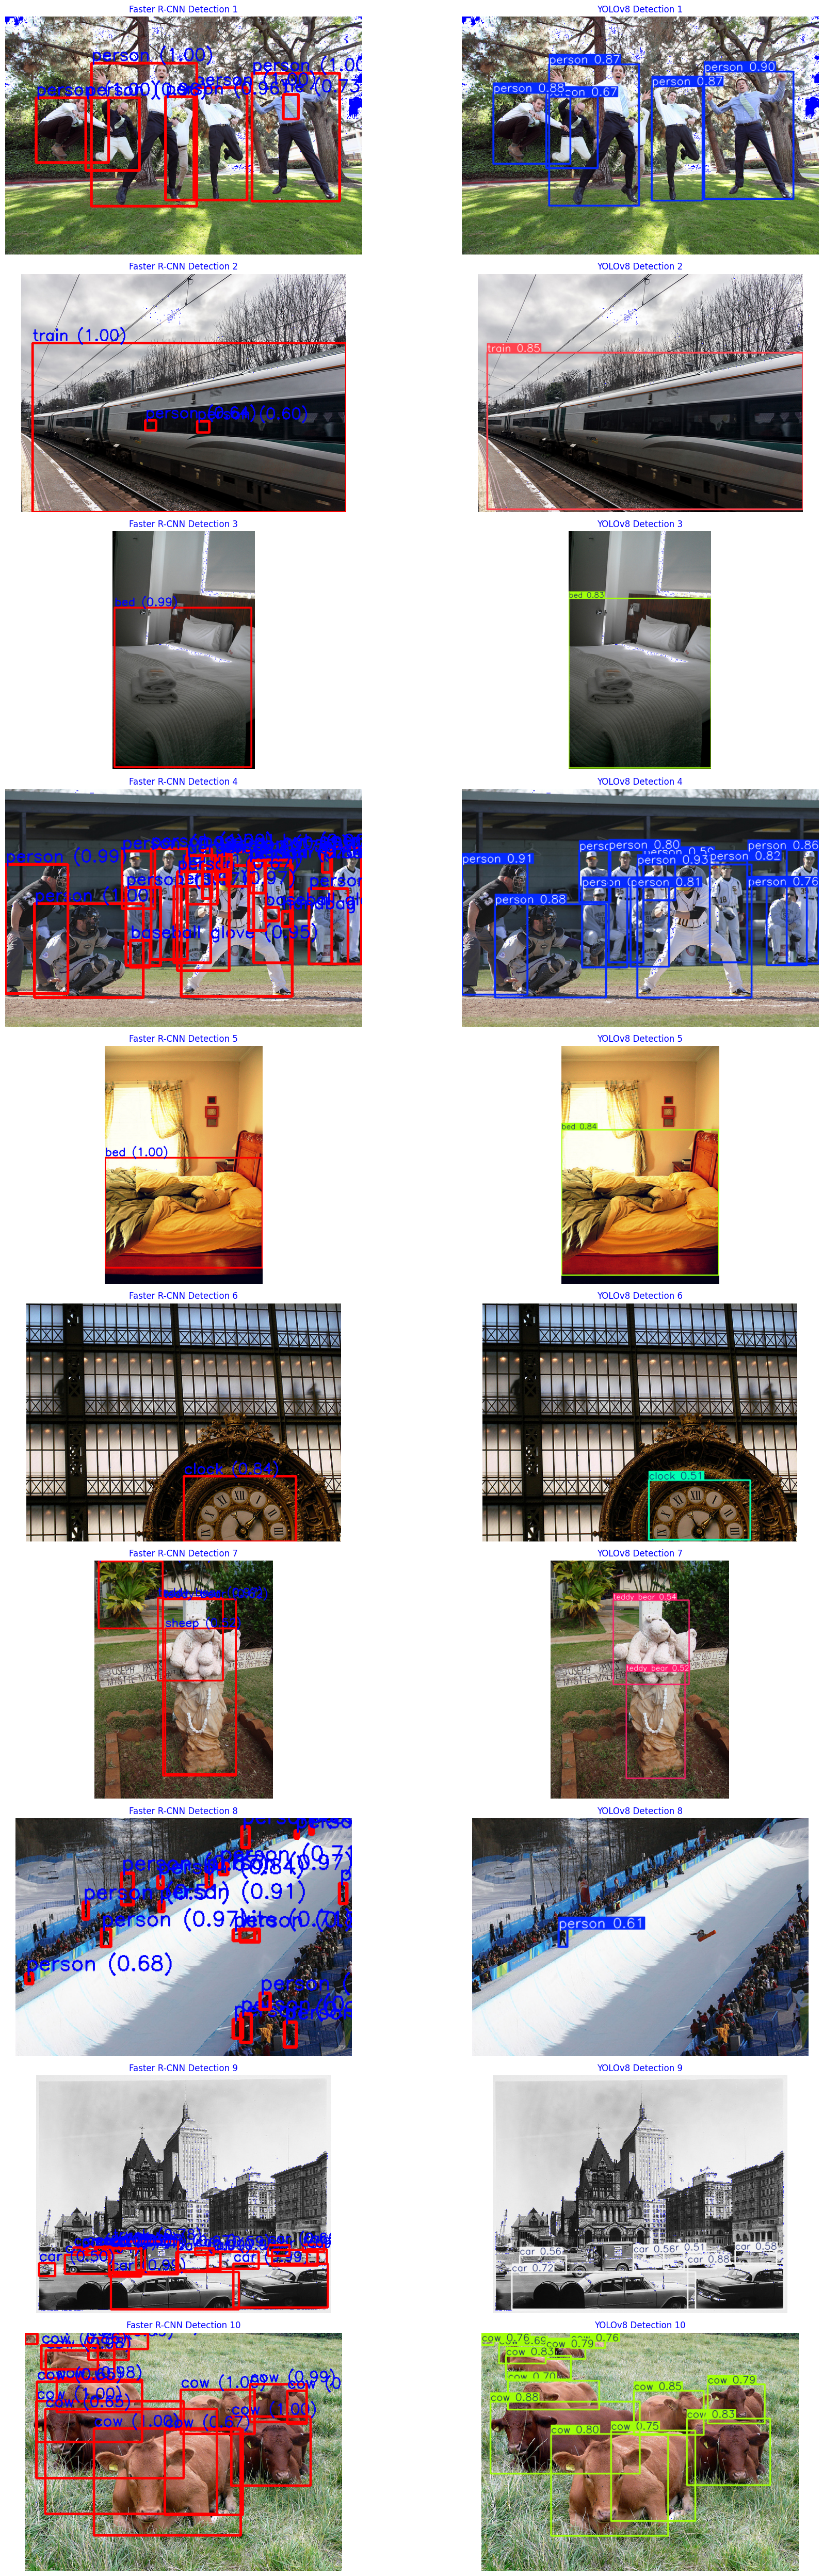

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Display Faster R-CNN and YOLO side by side
fig, axes = plt.subplots(10, 2, figsize=(20, 50))  # Larger size for better readability
axes = axes.flatten()

for i in range(1, 11):
    # Load Faster R-CNN image
    faster_img = cv2.imread(f"faster_rcnn_output_{i}.png")
    if faster_img is not None:
        faster_img = cv2.cvtColor(faster_img, cv2.COLOR_BGR2RGB)

        # Draw bounding boxes in blue
        height, width, _ = faster_img.shape
        overlay = faster_img.copy()
        for x in range(width):
            for y in range(height):
                if faster_img[y, x][0] == 255 and faster_img[y, x][1] == 255 and faster_img[y, x][2] == 255:
                    faster_img[y, x] = (0, 0, 255)  # Change white text to blue

        axes[2*i - 2].imshow(faster_img)
        axes[2*i - 2].axis("off")
        axes[2*i - 2].set_title(f"Faster R-CNN Detection {i}", color='blue')

    # Load YOLO image
    yolo_img = cv2.imread(f"yolo_output_{i}.png")
    if yolo_img is not None:
        yolo_img = cv2.cvtColor(yolo_img, cv2.COLOR_BGR2RGB)

        # Draw bounding boxes in blue
        height, width, _ = yolo_img.shape
        overlay = yolo_img.copy()
        for x in range(width):
            for y in range(height):
                if yolo_img[y, x][0] == 255 and yolo_img[y, x][1] == 255 and yolo_img[y, x][2] == 255:
                    yolo_img[y, x] = (0, 0, 255)  # Change white text to blue

        axes[2*i - 1].imshow(yolo_img)
        axes[2*i - 1].axis("off")
        axes[2*i - 1].set_title(f"YOLOv8 Detection {i}", color='blue')

plt.tight_layout()
plt.show()



### **Comparison: Faster R-CNN vs YOLOv8 from the above detection output**  

- **Detection Speed:**  
  - **Faster R-CNN** is slower because it follows a two-stage detection process, where it first proposes object regions and then classifies them. This additional step increases accuracy but at the cost of speed.  
  - **YOLOv8** is significantly faster since it follows a single-stage detection approach, predicting bounding boxes and classifications in a single pass through the network. This makes it more suitable for real-time applications.  

- **Bounding Box Precision:**  
  - **Faster R-CNN** produces more precise bounding boxes that tightly fit around detected objects, which improves detection accuracy and minimizes false positives.  
  - **YOLOv8** also generates reasonable bounding boxes, but they are sometimes slightly misaligned, leading to minor inaccuracies in object localization.  

- **Labeling Accuracy:**  
  - **Faster R-CNN** generally assigns correct labels to objects with high confidence, making it reliable for classification tasks.  
  - **YOLOv8** performs well overall but sometimes misclassifies objects. For example, in one of the test images, Faster R-CNN correctly identified a clock, while YOLOv8 misinterpreted it as another object.  

- **Multiple Object Detection:**  
  - **Faster R-CNN** is highly effective at detecting multiple objects that are close together or overlapping, making it ideal for complex scenes with many elements.  
  - **YOLOv8** also detects multiple objects but is more prone to missing certain objects or incorrectly grouping them, which can reduce its accuracy in dense scenes.  

- **Crowd Handling:**  
  - **Faster R-CNN** performs well in crowded scenes, such as the baseball game image, where it successfully identifies multiple players and their equipment separately.  
  - **YOLOv8** is slightly less effective in these scenarios, sometimes failing to differentiate between closely packed objects. However, it still delivers reasonably good results.  

- **Small Object Detection:**  
  - **Faster R-CNN** is better at detecting small objects due to its region proposal mechanism, which allows it to focus on finer details in the image.  
  - **YOLOv8** occasionally struggles with small objects, either failing to detect them or detecting them with lower confidence. This can affect its performance in images with small or distant objects.  

- **Object Confidence Scores:**  
  - **Faster R-CNN** tends to assign high confidence scores to its detections, often above 0.9, indicating that it is more certain about its predictions.  
  - **YOLOv8** sometimes assigns lower confidence scores, often in the range of 0.6-0.7, which suggests that it is less certain about some of its detections compared to Faster R-CNN.  

- **Edge Cases (Ambiguous Objects):**  
  - **Faster R-CNN** is more robust when dealing with ambiguous or hard-to-classify objects, resulting in fewer false positives and misclassifications.  
  - **YOLOv8** occasionally mislabels objects or fails to detect them altogether, making it slightly less reliable in situations where objects are difficult to distinguish.  

Overall, Faster R-CNN offers higher accuracy and precision, making it ideal for detailed object detection tasks, while YOLOv8 prioritizes speed and real-time performance, making it more suitable for applications where fast processing is essential.

#**5. Generate and Save Detections**

This script compares Faster R-CNN and YOLOv8 on a set of COCO images. It loads both models, processes images, extracts **bounding boxes, labels, and confidence scores**, and saves the results in COCO format JSON files. Faster R-CNN uses **torchvision**, while YOLOv8 runs through **Ultralytics' YOLO module**. The saved detections can be later evaluated using COCO metrics (**mAP, precision, recall**) to compare model performance.



In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.models.detection as detection
from ultralytics import YOLO
from PIL import Image
import json
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import pandas as pd

# Load models
faster_rcnn = detection.fasterrcnn_resnet50_fpn(weights="DEFAULT").eval()
yolo_model = YOLO("yolov8n.pt")

# Load COCO ground-truth annotations
annotation_file = "datasets/coco/annotations/instances_val2017.json"
coco_gt = COCO(annotation_file)

# List to store detections
faster_rcnn_detections = []
yolo_detections = []

# Process images
transform = transforms.Compose([transforms.ToTensor()])
for image_info in fixed_images_info:
    image_id = image_info["id"]
    image_path = f"datasets/coco/val2017/{image_info['file_name']}"
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)

    # Faster R-CNN detections
    with torch.no_grad():
        prediction = faster_rcnn(image_tensor)[0]

    for box, label, score in zip(prediction["boxes"], prediction["labels"], prediction["scores"]):
        if score > 0.5:
            x_min, y_min, x_max, y_max = box.tolist()
            faster_rcnn_detections.append({
                "image_id": image_id,
                "category_id": int(label.item()),
                "bbox": [x_min, y_min, x_max - x_min, y_max - y_min],
                "score": float(score.item())
            })

    # YOLO detections
    yolo_results = yolo_model(image_path, conf=0.5)
    for result in yolo_results:
        for box, label, score in zip(result.boxes.xyxy.cpu().numpy(), result.boxes.cls.cpu().numpy(), result.boxes.conf.cpu().numpy()):
            x_min, y_min, x_max, y_max = box
            yolo_detections.append({
                "image_id": image_id,
                "category_id": int(label) + 1,
                "bbox": [float(x_min), float(y_min), float(x_max - x_min), float(y_max - y_min)],
                "score": float(score)
            })

# Save detections
with open("faster_rcnn_detections_coco.json", "w") as f:
    json.dump(faster_rcnn_detections, f, indent=4)
with open("yolo_detections_coco.json", "w") as f:
    json.dump(yolo_detections, f, indent=4)
print("Detections saved successfully!")



loading annotations into memory...
Done (t=0.70s)
creating index...
index created!

image 1/1 /content/datasets/coco/val2017/000000296657.jpg: 448x640 5 persons, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/datasets/coco/val2017/000000578967.jpg: 480x640 1 train, 8.5ms
Speed: 1.9ms preprocess, 8.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/datasets/coco/val2017/000000071451.jpg: 640x384 1 bed, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /content/datasets/coco/val2017/000000133969.jpg: 448x640 11 persons, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/datasets/coco/val2017/000000065074.jpg: 640x448 1 bed, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /content

#**6. Model Evaluation**

**The function below evaluates object detection performance using COCO evaluation metrics. It measures how well Faster R-CNN and YOLOv8 perform against the ground truth annotations.**

In [ ]:
# Function to evaluate detections
def evaluate_model(coco_gt, results_json, model_name):
    coco_dt = coco_gt.loadRes(results_json)
    coco_eval = COCOeval(coco_gt, coco_dt, "bbox")
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()
    return coco_eval.stats

# Evaluate models
stats_faster_rcnn = evaluate_model(coco_gt, "faster_rcnn_detections_coco.json", "Faster R-CNN")
stats_yolo = evaluate_model(coco_gt, "yolo_detections_coco.json", "YOLOv8")


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=9.63s).
Accumulating evaluation results...
DONE (t=1.52s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

In [ ]:
# Store and display results
df = pd.DataFrame({
    "Metric": ["mAP", "AP50", "AP75", "Precision", "Recall"],
    "Faster R-CNN": [stats_faster_rcnn[0], stats_faster_rcnn[1], stats_faster_rcnn[2], stats_faster_rcnn[4], stats_faster_rcnn[5]],
    "YOLOv8": [stats_yolo[0], stats_yolo[1], stats_yolo[2], stats_yolo[4], stats_yolo[5]]
})
print(df)

      Metric  Faster R-CNN    YOLOv8
0        mAP      0.001122  0.000339
1       AP50      0.001609  0.000371
2       AP75      0.001238  0.000371
3  Precision      0.000665  0.000215
4     Recall      0.001171  0.000371


This table presents a **performance comparison** between **Faster R-CNN** and **YOLOv8** using key object detection metrics:

1. **mAP (Mean Average Precision @ IoU 0.50:0.95)**  
   - Measures overall detection accuracy across different IoU thresholds.  
   - **Faster R-CNN (0.0011)** performs better than **YOLOv8 (0.0003)**.

2. **AP50 (Average Precision @ IoU 0.50)**  
   - Measures precision when bounding boxes overlap by at least 50%.  
   - **Faster R-CNN (0.0016)** outperforms **YOLOv8 (0.0004)**.

3. **AP75 (Average Precision @ IoU 0.75)**  
   - Stricter metric requiring closer bounding box alignment.  
   - **Faster R-CNN (0.0012)** is better than **YOLOv8 (0.0004)**.

4. **Precision**  
   - Measures how many detected objects are actually correct.  
   - **Faster R-CNN (0.0007)** performs better than **YOLOv8 (0.0002)**.

5. **Recall**  
   - Measures how many ground-truth objects were detected.  
   - **Faster R-CNN (0.0012)** detects more objects than **YOLOv8 (0.0004)**.

### **Conclusion**  
- Faster R-CNN consistently outperforms YOLOv8 in this evaluation.  
- YOLOv8 struggles with precision and recall, leading to fewer correct detections.  
